# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from sklearn.metrics import mean_absolute_percentage_error # library for evaluation  mape
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ADA"
cryptoPair = "USDT"

trainTestSplit = 0.8

# Loading dataset

In [3]:
api_key = 'API' 
api_secret = 'SECRET_API'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data = data.iloc[:-1 , :]

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,0.18292000
2021-01-01 07:59:59.999,0.17955000
2021-01-01 11:59:59.999,0.17950000
2021-01-01 15:59:59.999,0.18055000
2021-01-01 19:59:59.999,0.17432000


### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,1.32900000
2021-12-31 11:59:59.999,1.36100000
2021-12-31 15:59:59.999,1.35500000
2021-12-31 19:59:59.999,1.28600000
2021-12-31 23:59:59.999,1.30800000


### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Shape of data

In [8]:
data.shape #shape of data

(2190, 1)

### Data information

In [9]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2021-01-01 03:59:59.999000 to 2021-12-31 23:59:59.999000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2190 non-null   object
dtypes: object(1)
memory usage: 34.2+ KB


### Data types of all coloumns

In [10]:
data.dtypes #data types of data

close    object
dtype: object

### Checking missing Values

In [11]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,close


### Count of missing values

In [12]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [13]:
data.isnull().values.any() #checking the null values 

False

### Counts of missing values in each column

In [14]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

### Data Description

In [15]:
data.describe() # statics of data 

,close
count,2190
unique,1940
top,2.18900000
freq,4


In [16]:
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [17]:
data['date'] = data.index # taking dates in date column 
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

### Close price with respect to year 

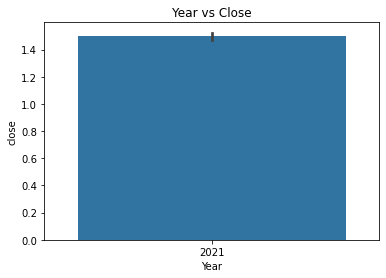

In [18]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

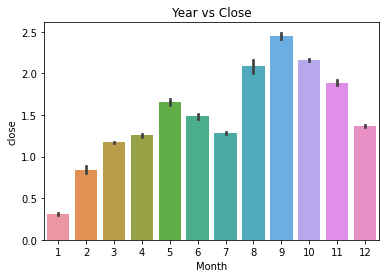

In [19]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Hour 

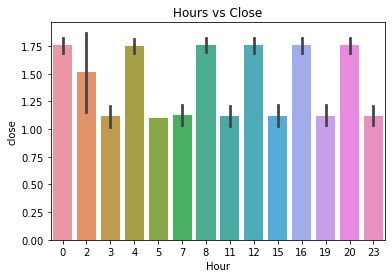

In [20]:
sns.barplot(x='Hour', y='close', data=data).set(title='Hours vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Minutes 

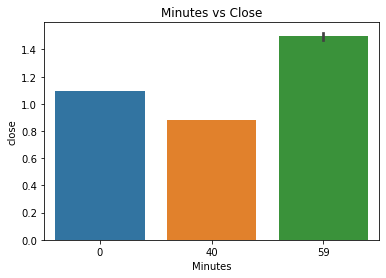

In [21]:
sns.barplot(x='Minutes', y='close', data=data).set(title='Minutes vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

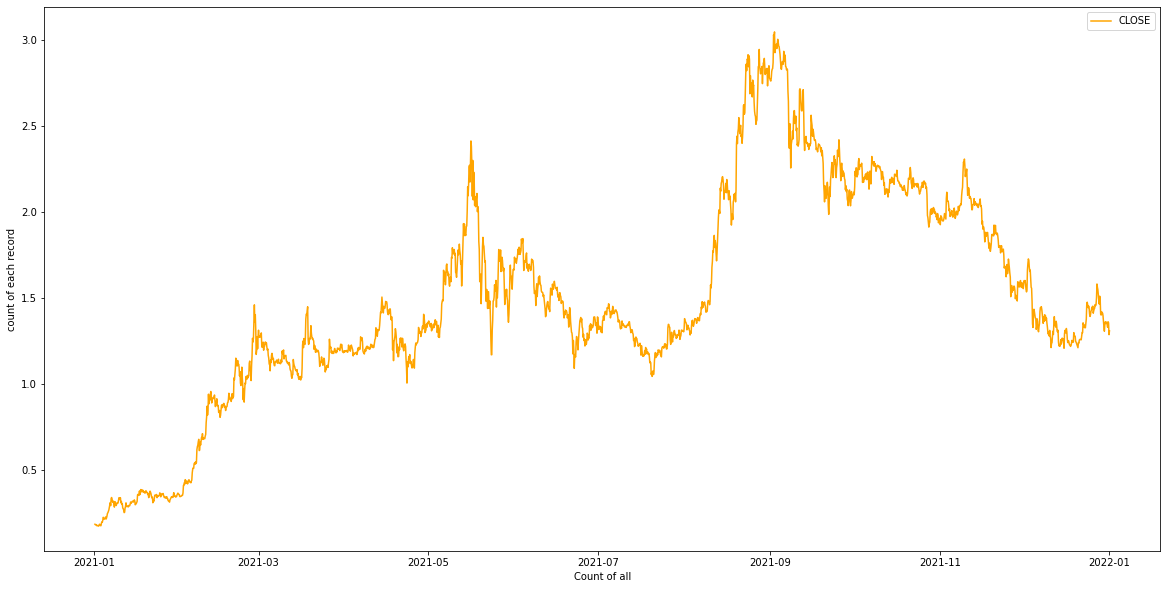

In [22]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

### Loading the whale data

In [23]:
priceData=pd.read_csv('Datasets/dataFileWhaleADA.csv')

In [24]:
li = priceData['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [25]:
priceData = priceData[['date','time','tweet']]
priceData['tweet'].head()

0    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
1    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
2    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
3    🚨 🚨 🚨  29,999,998 #USDT (29,999,998 USD) trans...
4    🚨 🚨 🚨 🚨 🚨 🚨  69,997,439 #USDT (69,997,439 USD)...
Name: tweet, dtype: object

In [26]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
priceData['amountTransfer'] = priceData['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
priceData['amountTransfer'] = priceData['amountTransfer'].str[1]

In [27]:
data['whaleCount'] = 0

In [28]:
for i, row in enumerate(priceData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

# -----------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [29]:
sentData=pd.read_csv('Datasets/dataFileADA.csv')

In [30]:
li = sentData['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [31]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [32]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [33]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [34]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [35]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [36]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

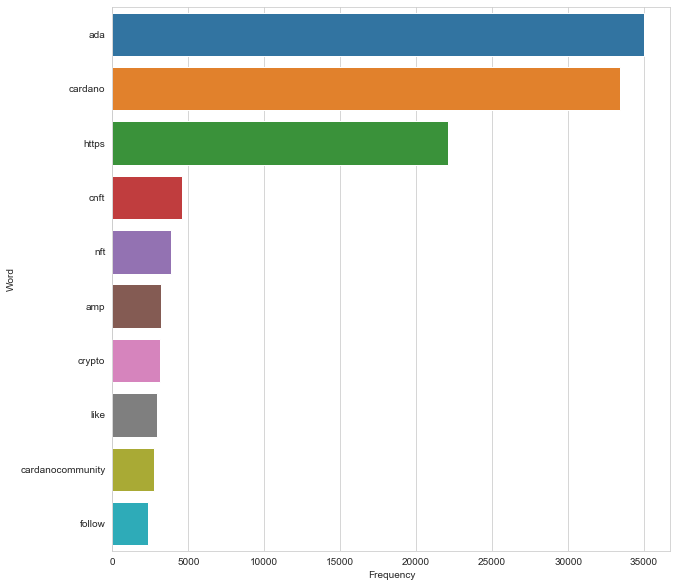

In [37]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [38]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [39]:
sentData["Polarity"] = sentData["tweet"].apply(sentiment)

In [40]:
sentData = sentData[['date','time','tweet','Polarity']]

In [41]:
sentData.tail()

,date,time,tweet,Polarity
28421,2021-01-01,03:58:22,I see a scenario where #Cardano $ADA makes Jan...,0.4576
28422,2021-01-01,03:32:28,What will be #Cardano $ADA's highest price in ...,0.0000
28423,2021-01-01,00:49:33,"So a friend told me about #Cardano, then I tol...",0.9515
28424,2021-01-01,00:45:52,Sorry about tweet that was deleted. Here its b...,0.5267
28425,2021-01-01,00:06:07,Wow. Just wow. #Bitcoin #Etheruem #XRP #Bitcoi...,0.8225


# Getting sentiments based on the popularity score

In [42]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [43]:
sentData['Sentiments'] = sentData.apply(sentiments, axis=1)

# sentiments with their counts

In [44]:
sentData['Sentiments'].value_counts()

Positive    16927
Neutral      7269
Negative     4230
Name: Sentiments, dtype: int64

In [45]:
sentData.iloc[:25]

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:46:35,The Diamond Mine is open! We are giving away t...,0.9449,Positive
1,2021-12-30,23:43:35,A project I have been following but haven't ha...,-0.2755,Negative
2,2021-12-30,23:34:10,Why will 2022🌠 Be The Best Year For #Cardano ...,0.6369,Positive
3,2021-12-30,23:13:52,"BIG New Year’s Giveaway!!! 1st 1,000,000,...",0.7412,Positive
4,2021-12-30,23:12:12,Bought this NFT on the Cardano Blockchain! 🧞‍♂...,0.6696,Positive
5,2021-12-30,23:09:26,#CardanoCommunity Stake with BICEP 💪 for BISON...,0.3612,Positive
6,2021-12-30,22:49:10,Top APR% on the OpenSwap farm today: ➢95% $Ope...,0.6597,Positive
7,2021-12-30,22:40:49,Good Evening #CardanoCommunity ✨ We just teame...,0.6967,Positive
8,2021-12-30,22:37:04,Probably nothing...@BenjaminsGroup Cannot wai...,0.7964,Positive
9,2021-12-30,22:28:07,#Cosmos and #Cardano Ecosystems Will Be Huge N...,0.3182,Positive


In [46]:
data['sentimentCount'] = 0

In [47]:
for i, row in enumerate(sentData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [48]:
data.head()

,close,date,Month,Day,Year,Hour,Minutes,whaleCount,sentimentCount
2021-01-01 03:59:59.999,0.18292,2021-01-01 03:59:59.999,1,1,2021,3,59,0,4
2021-01-01 07:59:59.999,0.17955,2021-01-01 07:59:59.999,1,1,2021,7,59,0,0
2021-01-01 11:59:59.999,0.17950,2021-01-01 11:59:59.999,1,1,2021,11,59,12,4
2021-01-01 15:59:59.999,0.18055,2021-01-01 15:59:59.999,1,1,2021,15,59,8,6
2021-01-01 19:59:59.999,0.17432,2021-01-01 19:59:59.999,1,1,2021,19,59,0,4


<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [49]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,whaleCount,sentimentCount
2021-01-01 03:59:59.999,1,1,2021,3,59,0,4
2021-01-01 07:59:59.999,1,1,2021,7,59,0,0
2021-01-01 11:59:59.999,1,1,2021,11,59,12,4
2021-01-01 15:59:59.999,1,1,2021,15,59,8,6
2021-01-01 19:59:59.999,1,1,2021,19,59,0,4
...,...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0,0


### Taking target as output

In [50]:
y=data['close'] # output close 
y #output 

2021-01-01 03:59:59.999    0.18292
2021-01-01 07:59:59.999    0.17955
2021-01-01 11:59:59.999    0.17950
2021-01-01 15:59:59.999    0.18055
2021-01-01 19:59:59.999    0.17432
                            ...   
2021-12-31 07:59:59.999    1.32900
2021-12-31 11:59:59.999    1.36100
2021-12-31 15:59:59.999    1.35500
2021-12-31 19:59:59.999    1.28600
2021-12-31 23:59:59.999    1.30800
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [51]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [52]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['sentimentCount','whaleCount']],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.192
ARIMA(0, 0, 1) RMSE=1.700
ARIMA(0, 0, 2) RMSE=1.715
ARIMA(0, 1, 0) RMSE=0.536
ARIMA(0, 1, 1) RMSE=0.536
ARIMA(0, 1, 2) RMSE=0.536
ARIMA(0, 2, 0) RMSE=3.051
ARIMA(0, 2, 1) RMSE=0.809
ARIMA(0, 2, 2) RMSE=0.805
ARIMA(1, 0, 0) RMSE=0.349
ARIMA(1, 0, 1) RMSE=0.330
ARIMA(1, 0, 2) RMSE=0.564
ARIMA(1, 1, 0) RMSE=0.536
ARIMA(1, 1, 1) RMSE=0.536
ARIMA(1, 1, 2) RMSE=0.536
ARIMA(1, 2, 0) RMSE=1.215
ARIMA(1, 2, 1) RMSE=0.807
ARIMA(1, 2, 2) RMSE=0.808
ARIMA(2, 0, 0) RMSE=0.161
ARIMA(2, 0, 1) RMSE=0.301
ARIMA(2, 0, 2) RMSE=0.322
ARIMA(2, 1, 0) RMSE=0.536
ARIMA(2, 1, 1) RMSE=0.536
ARIMA(2, 1, 2) RMSE=0.536
ARIMA(2, 2, 0) RMSE=0.168
ARIMA(2, 2, 1) RMSE=0.618
ARIMA(2, 2, 2) RMSE=0.808
ARIMA(4, 0, 0) RMSE=0.995
ARIMA(4, 0, 1) RMSE=0.177
ARIMA(4, 0, 2) RMSE=0.360
ARIMA(4, 1, 0) RMSE=0.536
ARIMA(4, 1, 1) RMSE=0.536
ARIMA(4, 1, 2) RMSE=0.536
ARIMA(4, 2, 0) RMSE=0.830
ARIMA(4, 2, 1) RMSE=0.262
ARIMA(4, 2, 2) RMSE=0.260
ARIMA(6, 0, 0) RMSE=0.673
ARIMA(6, 0, 1) RMSE=0.670
ARIMA(6, 0, 

In [53]:
Xtest = data.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['sentimentCount','whaleCount']],order=(best_cfg))
results=model.fit()

In [54]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [55]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  0.02116


# MAE

In [56]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  0.12074


# RMSE

In [57]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  0.14546


# MAPE

In [58]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.07403


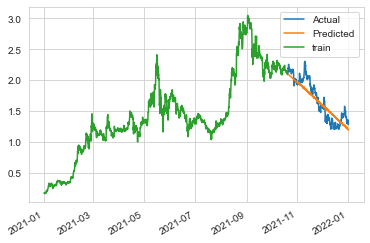

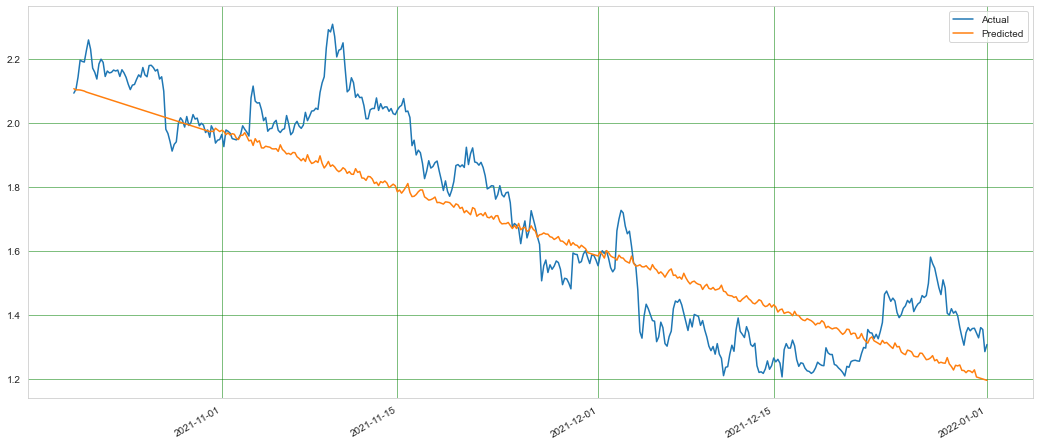

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [60]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['sentimentCount','whaleCount']],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.566
ARIMA(0, 0, 1) RMSE=0.562
ARIMA(0, 0, 2) RMSE=0.560
ARIMA(0, 1, 0) RMSE=0.806
ARIMA(0, 1, 1) RMSE=0.778
ARIMA(0, 1, 2) RMSE=0.806
ARIMA(0, 2, 0) RMSE=3.315
ARIMA(0, 2, 1) RMSE=0.469
ARIMA(0, 2, 2) RMSE=0.152
ARIMA(1, 0, 0) RMSE=0.340
ARIMA(1, 0, 1) RMSE=0.622
ARIMA(1, 0, 2) RMSE=0.318
ARIMA(1, 1, 0) RMSE=0.799
ARIMA(1, 1, 1) RMSE=0.788
ARIMA(1, 1, 2) RMSE=0.711
ARIMA(1, 2, 0) RMSE=1.649
ARIMA(1, 2, 1) RMSE=0.178
ARIMA(1, 2, 2) RMSE=0.294
ARIMA(2, 0, 0) RMSE=0.215
ARIMA(2, 0, 1) RMSE=0.718
ARIMA(2, 0, 2) RMSE=0.513
ARIMA(2, 1, 0) RMSE=0.791
ARIMA(2, 1, 1) RMSE=0.796
ARIMA(2, 1, 2) RMSE=0.755
ARIMA(2, 2, 0) RMSE=0.578
ARIMA(2, 2, 1) RMSE=0.354
ARIMA(2, 2, 2) RMSE=0.451
ARIMA(4, 0, 0) RMSE=0.609
ARIMA(4, 0, 1) RMSE=0.457
ARIMA(4, 0, 2) RMSE=0.662
ARIMA(4, 1, 0) RMSE=0.773
ARIMA(4, 1, 1) RMSE=0.603
ARIMA(4, 1, 2) RMSE=0.595
ARIMA(4, 2, 0) RMSE=1.503
ARIMA(4, 2, 1) RMSE=1.734
ARIMA(4, 2, 2) RMSE=0.469
ARIMA(6, 0, 0) RMSE=0.376
ARIMA(6, 0, 1) RMSE=0.584
ARIMA(6, 0, 

In [61]:
Xtest = data.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['sentimentCount','whaleCount']],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [62]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [63]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  0.02319


# MAE

In [64]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  0.12507


# RMSE

In [65]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  0.1523


# MAPE

In [66]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.08124


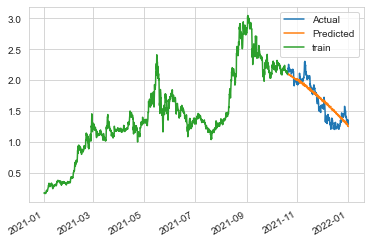

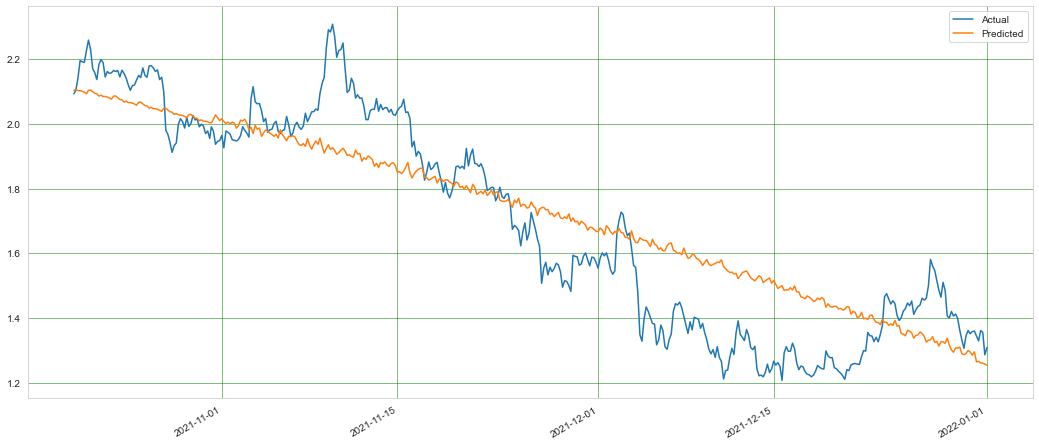

In [67]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [68]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [69]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 918.44030339
Iteration 2, loss = 441.61810273
Iteration 3, loss = 214.60789331
Iteration 4, loss = 128.71689049
Iteration 5, loss = 84.83892259
Iteration 6, loss = 56.94565043
Iteration 7, loss = 36.46741604
Iteration 8, loss = 20.87463877
Iteration 9, loss = 11.85189831
Iteration 10, loss = 6.69152811
Iteration 11, loss = 3.84399561
Iteration 12, loss = 2.00823361
Iteration 13, loss = 1.69501195
Iteration 14, loss = 0.97902905
Iteration 15, loss = 0.67091025
Iteration 16, loss = 0.57381191
Iteration 17, loss = 0.50601456
Iteration 18, loss = 0.36213626
Iteration 19, loss = 0.31546075
Iteration 20, loss = 0.29238150
Iteration 21, loss = 0.26697763
Iteration 22, loss = 0.25059384
Iteration 23, loss = 0.23078208
Iteration 24, loss = 0.20482147
Iteration 25, loss = 0.18390351
Iteration 26, loss = 0.16385043
Iteration 27, loss = 0.15547407
Iteration 28, loss = 0.13384845
Iteration 29, loss = 0.11476681
Iteration 30, loss = 0.09855800
Iteration 31, loss = 0.13282127
Iter

Iteration 70, loss = 0.05788236
Iteration 71, loss = 0.06123815
Iteration 72, loss = 0.05208982
Iteration 73, loss = 0.05048052
Iteration 74, loss = 0.05356265
Iteration 75, loss = 0.04725383
Iteration 76, loss = 0.04074382
Iteration 77, loss = 0.03822729
Iteration 78, loss = 0.03776868
Iteration 79, loss = 0.03624522
Iteration 80, loss = 0.03929515
Iteration 81, loss = 0.03840076
Iteration 82, loss = 0.04732313
Iteration 83, loss = 0.04527564
Iteration 84, loss = 0.03018069
Iteration 85, loss = 0.07861645
Iteration 86, loss = 0.06545346
Iteration 87, loss = 0.04442399
Iteration 88, loss = 0.04070852
Iteration 89, loss = 0.03691598
Iteration 90, loss = 0.03232636
Iteration 91, loss = 0.03007265
Iteration 92, loss = 0.11154364
Iteration 93, loss = 0.11029632
Iteration 94, loss = 0.07706910
Iteration 95, loss = 0.06589472
Iteration 96, loss = 0.05746743
Iteration 97, loss = 0.03808313
Iteration 98, loss = 0.03391468
Iteration 99, loss = 0.02871852
Iteration 100, loss = 0.02776523
Iterati

Iteration 37, loss = 0.25896158
Iteration 38, loss = 0.21506916
Iteration 39, loss = 0.20972436
Iteration 40, loss = 0.23877662
Iteration 41, loss = 0.26558572
Iteration 42, loss = 0.23255885
Iteration 43, loss = 0.21545505
Iteration 44, loss = 0.20197119
Iteration 45, loss = 0.19682105
Iteration 46, loss = 0.19630294
Iteration 47, loss = 0.20829968
Iteration 48, loss = 0.21229390
Iteration 49, loss = 0.24487361
Iteration 50, loss = 0.24152213
Iteration 51, loss = 0.20667552
Iteration 52, loss = 0.20396694
Iteration 53, loss = 0.24132053
Iteration 54, loss = 0.23565674
Iteration 55, loss = 0.19361011
Iteration 56, loss = 0.17700575
Iteration 57, loss = 0.19343827
Iteration 58, loss = 0.17420045
Iteration 59, loss = 0.17461456
Iteration 60, loss = 0.17248241
Iteration 61, loss = 0.17272223
Iteration 62, loss = 0.16103716
Iteration 63, loss = 0.16236135
Iteration 64, loss = 0.17329663
Iteration 65, loss = 0.17553812
Iteration 66, loss = 0.16458359
Iteration 67, loss = 0.15990041
Iteratio

Iteration 2, loss = 1640.40686130
Iteration 3, loss = 252.37069090
Iteration 4, loss = 1211.10964489
Iteration 5, loss = 858.02623643
Iteration 6, loss = 122.21447742
Iteration 7, loss = 71.15531173
Iteration 8, loss = 192.77326033
Iteration 9, loss = 85.94428352
Iteration 10, loss = 5.36402767
Iteration 11, loss = 30.70450476
Iteration 12, loss = 25.52986373
Iteration 13, loss = 2.87125763
Iteration 14, loss = 5.95014380
Iteration 15, loss = 6.50532413
Iteration 16, loss = 1.40731857
Iteration 17, loss = 2.06596518
Iteration 18, loss = 2.07376701
Iteration 19, loss = 0.97495416
Iteration 20, loss = 1.18520021
Iteration 21, loss = 1.06654403
Iteration 22, loss = 0.88253582
Iteration 23, loss = 0.85422487
Iteration 24, loss = 0.69425264
Iteration 25, loss = 0.67207594
Iteration 26, loss = 0.65697852
Iteration 27, loss = 0.61714233
Iteration 28, loss = 0.58014041
Iteration 29, loss = 0.55164134
Iteration 30, loss = 0.52105660
Iteration 31, loss = 0.46485637
Iteration 32, loss = 0.4415334

Iteration 89, loss = 0.14163890
Iteration 90, loss = 0.13802306
Iteration 91, loss = 0.17059519
Iteration 92, loss = 0.13143658
Iteration 93, loss = 0.13146439
Iteration 94, loss = 0.11347544
Iteration 95, loss = 0.11079655
Iteration 96, loss = 0.11646016
Iteration 97, loss = 0.10252395
Iteration 98, loss = 0.10488499
Iteration 99, loss = 0.10020585
Iteration 100, loss = 0.09838297
Iteration 101, loss = 0.10372730
Iteration 102, loss = 0.09886203
Iteration 103, loss = 0.09764055
Iteration 104, loss = 0.13067870
Iteration 105, loss = 0.20401434
Iteration 106, loss = 0.15252523
Iteration 107, loss = 0.12724476
Iteration 108, loss = 0.10439415
Iteration 109, loss = 0.13155911
Iteration 110, loss = 0.11239768
Iteration 111, loss = 0.09416121
Iteration 112, loss = 0.10166896
Iteration 113, loss = 0.10438577
Iteration 114, loss = 0.11260146
Iteration 115, loss = 0.10292262
Iteration 116, loss = 0.09548382
Iteration 117, loss = 0.10738854
Iteration 118, loss = 0.10264834
Iteration 119, loss =

Iteration 10, loss = 2.07970048
Iteration 11, loss = 1.45102530
Iteration 12, loss = 1.12522819
Iteration 13, loss = 1.01798669
Iteration 14, loss = 0.96067186
Iteration 15, loss = 0.77924770
Iteration 16, loss = 0.71678748
Iteration 17, loss = 0.62820795
Iteration 18, loss = 0.56760300
Iteration 19, loss = 0.54751582
Iteration 20, loss = 0.50901454
Iteration 21, loss = 0.48288390
Iteration 22, loss = 0.47066813
Iteration 23, loss = 0.44272698
Iteration 24, loss = 0.40985910
Iteration 25, loss = 0.38813446
Iteration 26, loss = 0.37078137
Iteration 27, loss = 0.37235378
Iteration 28, loss = 0.35195956
Iteration 29, loss = 0.29655670
Iteration 30, loss = 0.28945777
Iteration 31, loss = 0.27009294
Iteration 32, loss = 0.25111242
Iteration 33, loss = 0.23632049
Iteration 34, loss = 0.21839928
Iteration 35, loss = 0.21582463
Iteration 36, loss = 0.21095257
Iteration 37, loss = 0.19963998
Iteration 38, loss = 0.18780436
Iteration 39, loss = 0.17572747
Iteration 40, loss = 0.16596024
Iteratio

Iteration 46, loss = 0.21959194
Iteration 47, loss = 0.20892055
Iteration 48, loss = 0.20520742
Iteration 49, loss = 0.20717115
Iteration 50, loss = 0.20181400
Iteration 51, loss = 0.18434070
Iteration 52, loss = 0.18089484
Iteration 53, loss = 0.17971745
Iteration 54, loss = 0.18352565
Iteration 55, loss = 0.17975976
Iteration 56, loss = 0.18700472
Iteration 57, loss = 0.21421544
Iteration 58, loss = 0.21213767
Iteration 59, loss = 0.19055529
Iteration 60, loss = 0.19083403
Iteration 61, loss = 0.17409285
Iteration 62, loss = 0.16732355
Iteration 63, loss = 0.16331686
Iteration 64, loss = 0.16858193
Iteration 65, loss = 0.16635740
Iteration 66, loss = 0.16249382
Iteration 67, loss = 0.15975004
Iteration 68, loss = 0.16118535
Iteration 69, loss = 0.16707030
Iteration 70, loss = 0.19955159
Iteration 71, loss = 0.19217693
Iteration 72, loss = 0.19294695
Iteration 73, loss = 0.17089601
Iteration 74, loss = 0.16574428
Iteration 75, loss = 0.16011892
Iteration 76, loss = 0.17411660
Iteratio

Iteration 36, loss = 0.46059770
Iteration 37, loss = 0.39116547
Iteration 38, loss = 0.32728340
Iteration 39, loss = 0.25524755
Iteration 40, loss = 0.18666765
Iteration 41, loss = 0.12417481
Iteration 42, loss = 0.08688388
Iteration 43, loss = 0.06524296
Iteration 44, loss = 0.06055143
Iteration 45, loss = 0.05055635
Iteration 46, loss = 0.06316409
Iteration 47, loss = 0.06093767
Iteration 48, loss = 0.04624638
Iteration 49, loss = 0.04265356
Iteration 50, loss = 0.03819600
Iteration 51, loss = 0.03357946
Iteration 52, loss = 0.03581842
Iteration 53, loss = 0.03336304
Iteration 54, loss = 0.03216069
Iteration 55, loss = 0.03110992
Iteration 56, loss = 0.03233683
Iteration 57, loss = 0.03320502
Iteration 58, loss = 0.03692473
Iteration 59, loss = 0.03635369
Iteration 60, loss = 0.04163015
Iteration 61, loss = 0.03539839
Iteration 62, loss = 0.03274934
Iteration 63, loss = 0.03784832
Iteration 64, loss = 0.03580642
Iteration 65, loss = 0.03048194
Iteration 66, loss = 0.02782550
Iteratio

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [70]:
Model_R.best_params_

{'momentum': 0.7,
 'max_iter': 100,
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [71]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  1.42139


# MAE

In [72]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  1.0826


# RMSE

In [73]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  1.19222


# MAPE

In [74]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.72044


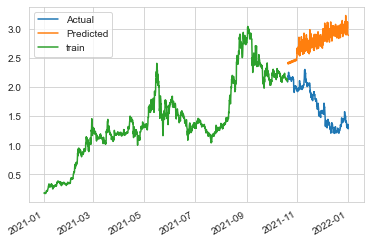

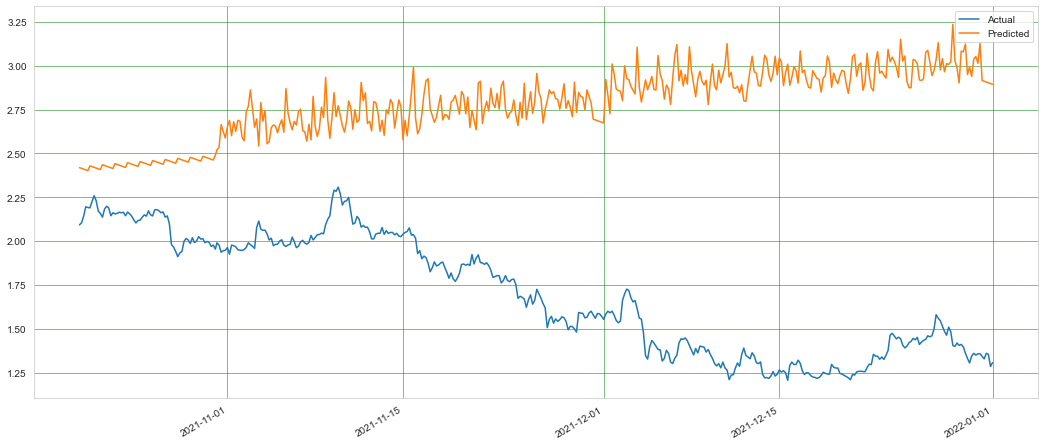

In [75]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [76]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [77]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 54.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [78]:
Model_R.best_params_

{'tol': 0.001, 'max_iter': 400, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [79]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  1.41068


# MAE

In [80]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  1.08162


# RMSE

In [81]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  1.18772


# MAPE

In [82]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.71914


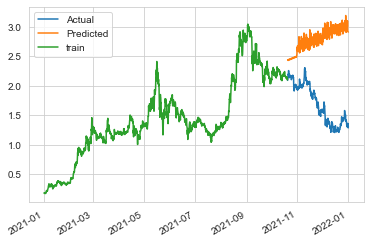

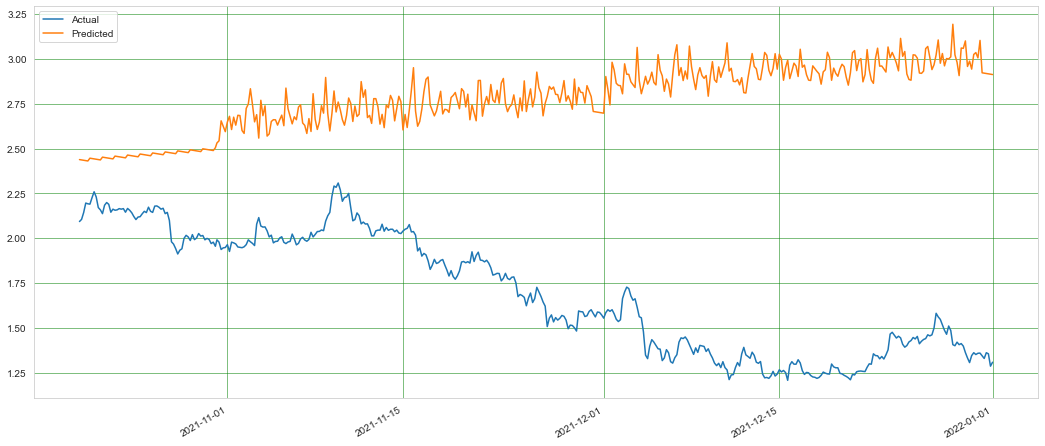

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [84]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [85]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 2.16 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [86]:
Model_R.best_params_

{'random_state': 10, 'min_samples_leaf': 50, 'max_depth': 50}

# Evaluation Measures on Test data

# MSE

In [87]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  0.4532


# MAE

In [88]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  0.58591


# RMSE

In [89]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  0.6732


# MAPE

In [90]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.39739


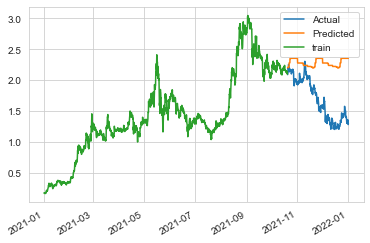

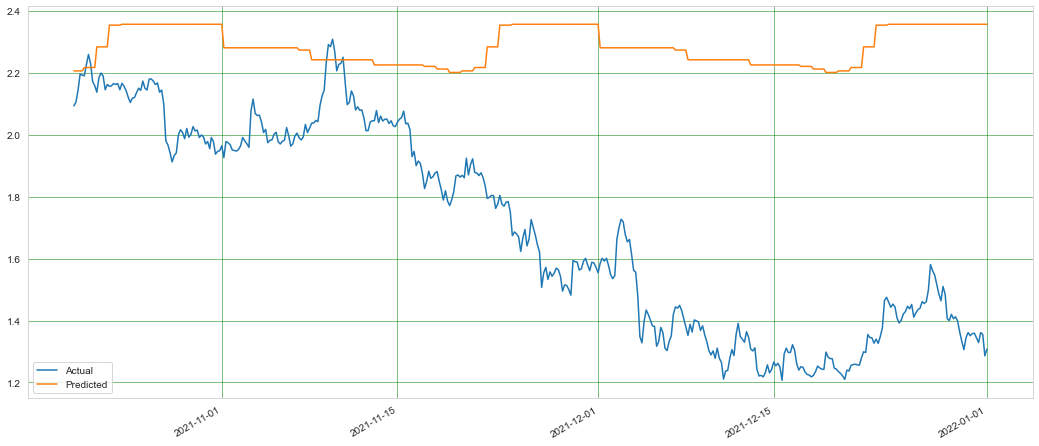

In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [92]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [93]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 6.5 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [94]:
Model_R.best_params_

{'n_estimators': 400, 'max_depth': 20, 'learning_rate': 0.1, 'base_score': 0.6}

# Evaluation Measures on Test data

# MSE

In [95]:
#y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  0.34271


# MAE

In [96]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  0.4872


# RMSE

In [97]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  0.58541


# MAPE

In [98]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.33619


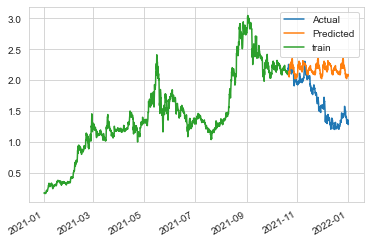

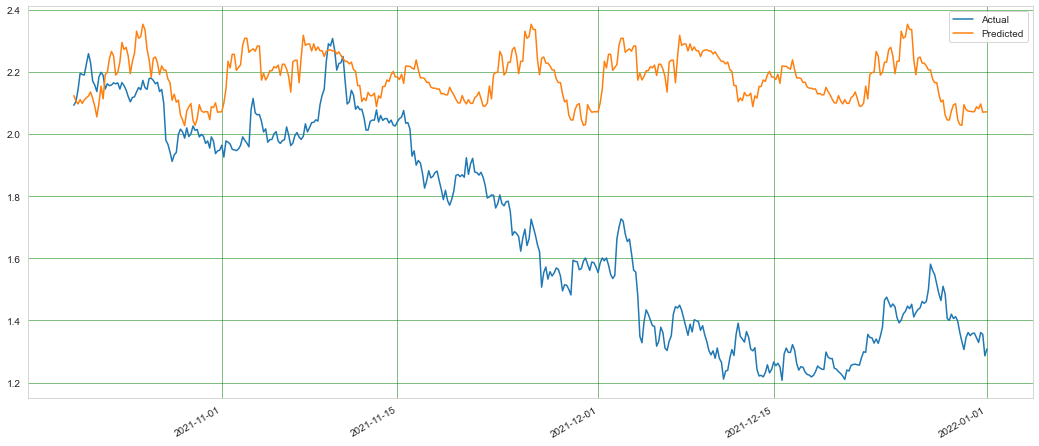

In [99]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [100]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MSE score |
+-------------------------+-----------+
|     ARIMAX Algorithm    |   0.021   |
|    SARIMAX Algorithm    |   0.023   |
|      MLP Algorithm      |   1.421   |
|     Ridge Algorithm     |   1.411   |
| Random Forest Algorithm |   0.453   |
|      XGB Algorithm      |   0.343   |
+-------------------------+-----------+


# Comparison of all algorithms Results on MAE score

In [101]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMAX Algorithm    |   0.121   |
|    SARIMAX Algorithm    |   0.125   |
|      MLP Algorithm      |   1.083   |
|     Ridge Algorithm     |   1.082   |
| Random Forest Algorithm |   0.586   |
|      XGB Algorithm      |   0.487   |
+-------------------------+-----------+


# Comparison of all algorithms Results on RMSE score

In [102]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   0.145    |
|    SARIMAX Algorithm    |   0.152    |
|      MLP Algorithm      |   1.192    |
|     Ridge Algorithm     |   1.188    |
| Random Forest Algorithm |   0.673    |
|      XGB Algorithm      |   0.585    |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [103]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   0.074    |
|    SARIMAX Algorithm    |   0.081    |
|      MLP Algorithm      |    0.72    |
|     Ridge Algorithm     |   0.719    |
| Random Forest Algorithm |   0.397    |
|      XGB Algorithm      |   0.336    |
+-------------------------+------------+


